### 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina' ## 그림 더 선명하게

import warnings
warnings.filterwarnings("ignore")

### 데이터 로드
- 타이타닉 데이터

In [2]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
## 전처리 완료된 데이터
titanic = pd.read_csv('Titanic_clean_2.csv',index_col=0)
df = titanic.copy()

### 데이터 확인

In [4]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Sex_male,Embarked_Q,Embarked_S
0,0,0,22.000000,1,0,7.2500,1,False,True,False,False,True,False,True
1,1,2,38.000000,1,0,71.2833,1,False,False,True,False,False,False,False
2,1,0,26.000000,0,0,7.9250,0,True,False,False,False,False,False,True
3,1,2,35.000000,1,0,53.1000,1,False,False,True,False,False,False,True
4,0,0,35.000000,0,0,8.0500,0,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,0,0,13.0000,0,False,False,False,True,True,False,True
887,1,2,19.000000,0,0,30.0000,0,True,False,False,False,False,False,True
888,0,0,21.845638,1,2,23.4500,3,True,False,False,False,False,False,True
889,1,2,26.000000,0,0,30.0000,0,False,True,False,False,True,False,False


## K-means

### 스케일링
- k-means 클러스터링은 거리 기반 알고리즘이기 때문에, 스케일링을 필수적으로 진행해주어야한다.
- 이상치에 매우 민감하기 때문에
- 유클리디안 거리를 기준으로 데이터를 클러스터링 하기 때문에 **연속형 변수에 적합**

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #0은 0으로, 1은 1로 변환
df2 = df.copy()
df2.loc[:,:] = scaler.fit_transform(df) #array로 반환되기 때문에 다시 DataFrame으로 변환

In [6]:
df2

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Sex_male,Embarked_Q,Embarked_S
0,0,0.0,0.271174,0.125,0.000000,0.014151,0.1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1,1.0,0.472229,0.125,0.000000,0.139136,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0.0,0.321438,0.000,0.000000,0.015469,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1.0,0.434531,0.125,0.000000,0.103644,0.1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0.0,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.5,0.334004,0.000,0.000000,0.025374,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
887,1,1.0,0.233476,0.000,0.000000,0.058556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0,0.0,0.269234,0.125,0.333333,0.045771,0.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,1.0,0.321438,0.000,0.000000,0.058556,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### k-means 클러스터링 진행
- 연속형 변수이면서, 승객을 분류할 수 있는 핵심 변수로 보이는 'Age', 'Fare' 변수를 가지고 클러스터링 진행
<br>다른 변수를 사용해도 됨

In [7]:
df_km = df2[["Survived","Age","Fare"]] #클러스터링용 데이터

<Axes: xlabel='Age', ylabel='Fare'>

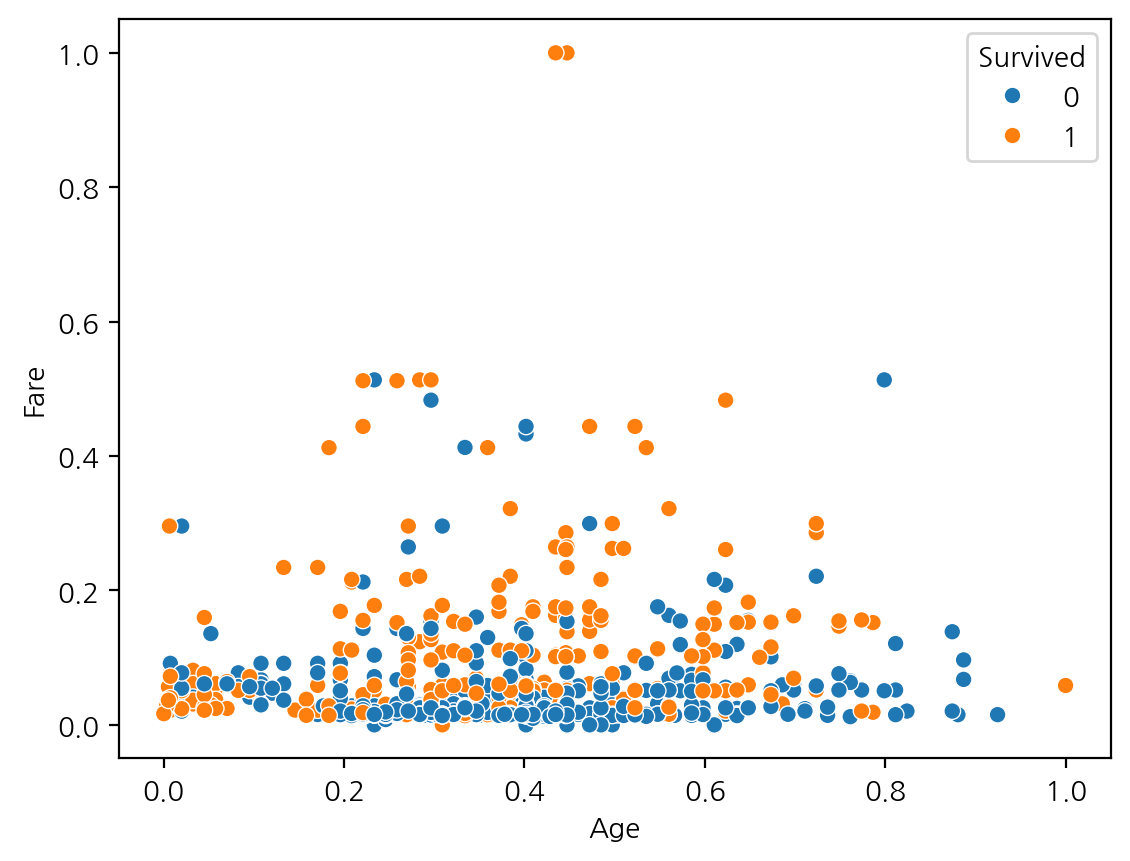

In [8]:
## 산점도 그려보기
sns.scatterplot(data=df_km, x="Age", y="Fare", hue="Survived")

이상치 존재?

#### Elbow method
- centroid의 개수 선택
- 모델의 **inertia** : 클러스터링 평가 지표 중 하나로 클러스터 중심과 클러스터 내 데이터 포인트들 간의 거리의 제곱합을 나타냄 (SSE)

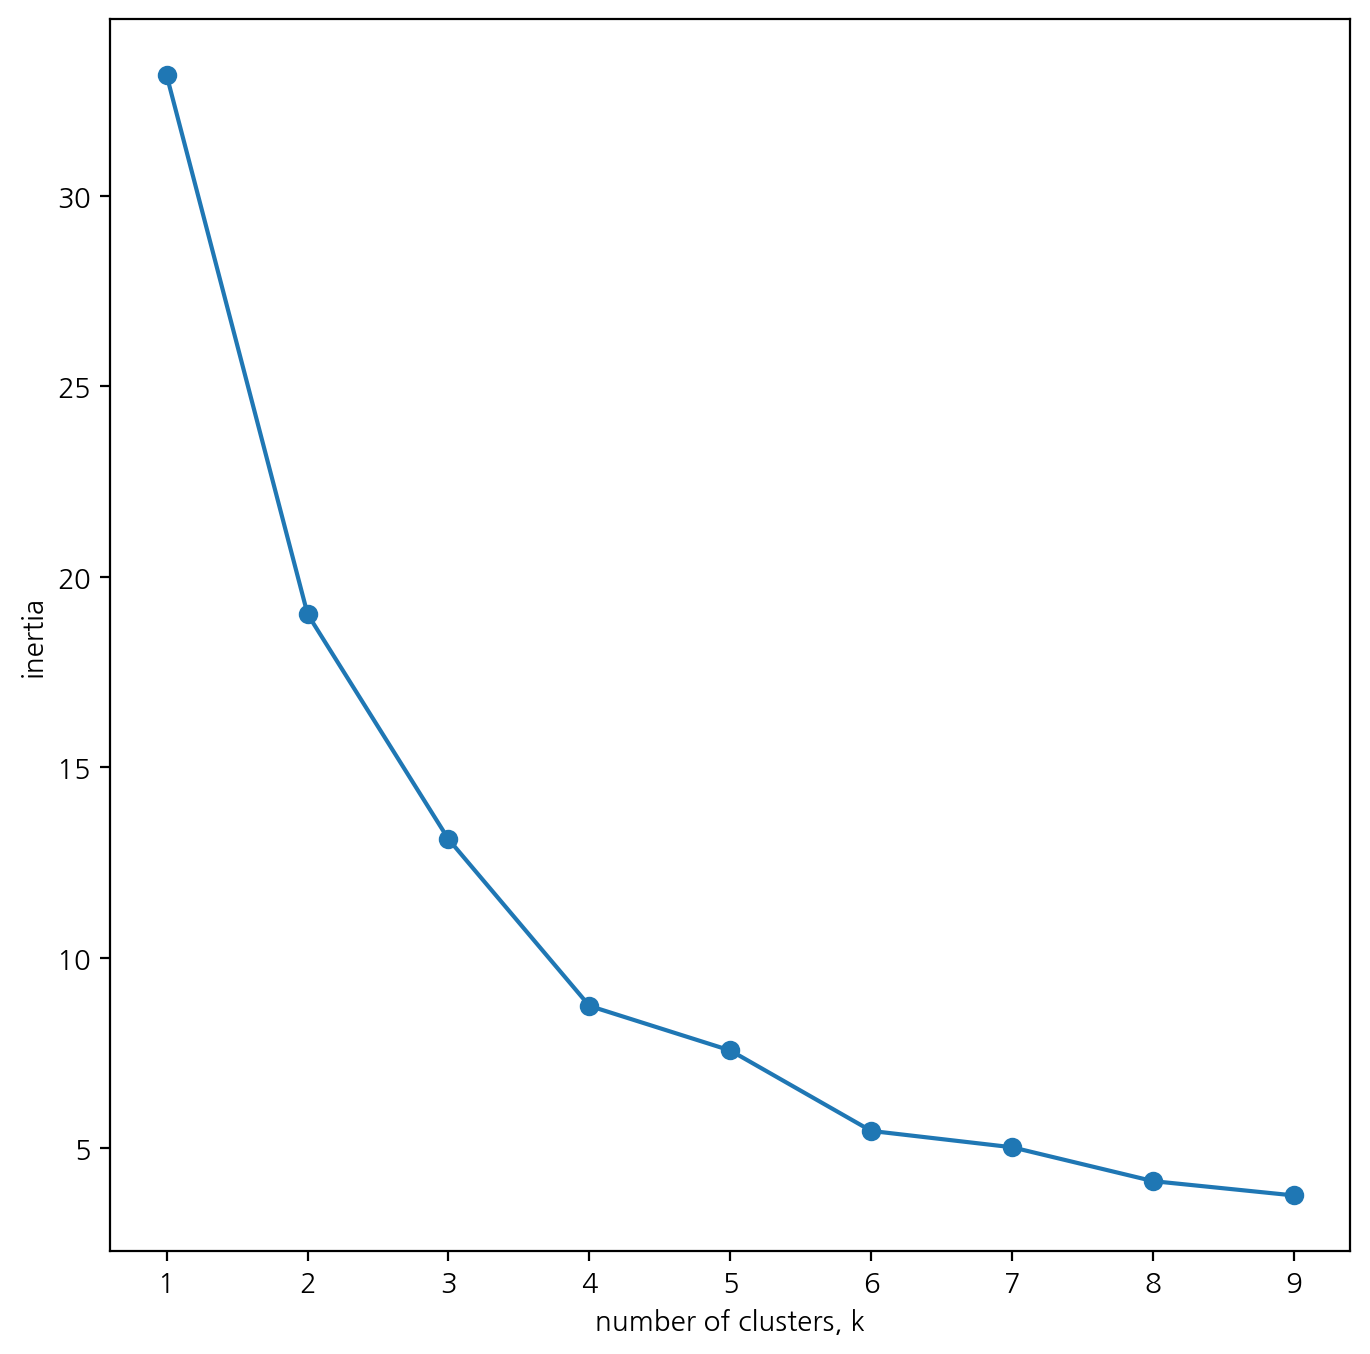

In [9]:
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = [] #각 중심점에서 데이터포인트 간의 거리 제곱합

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_km[['Age','Fare']])
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(1, 10))

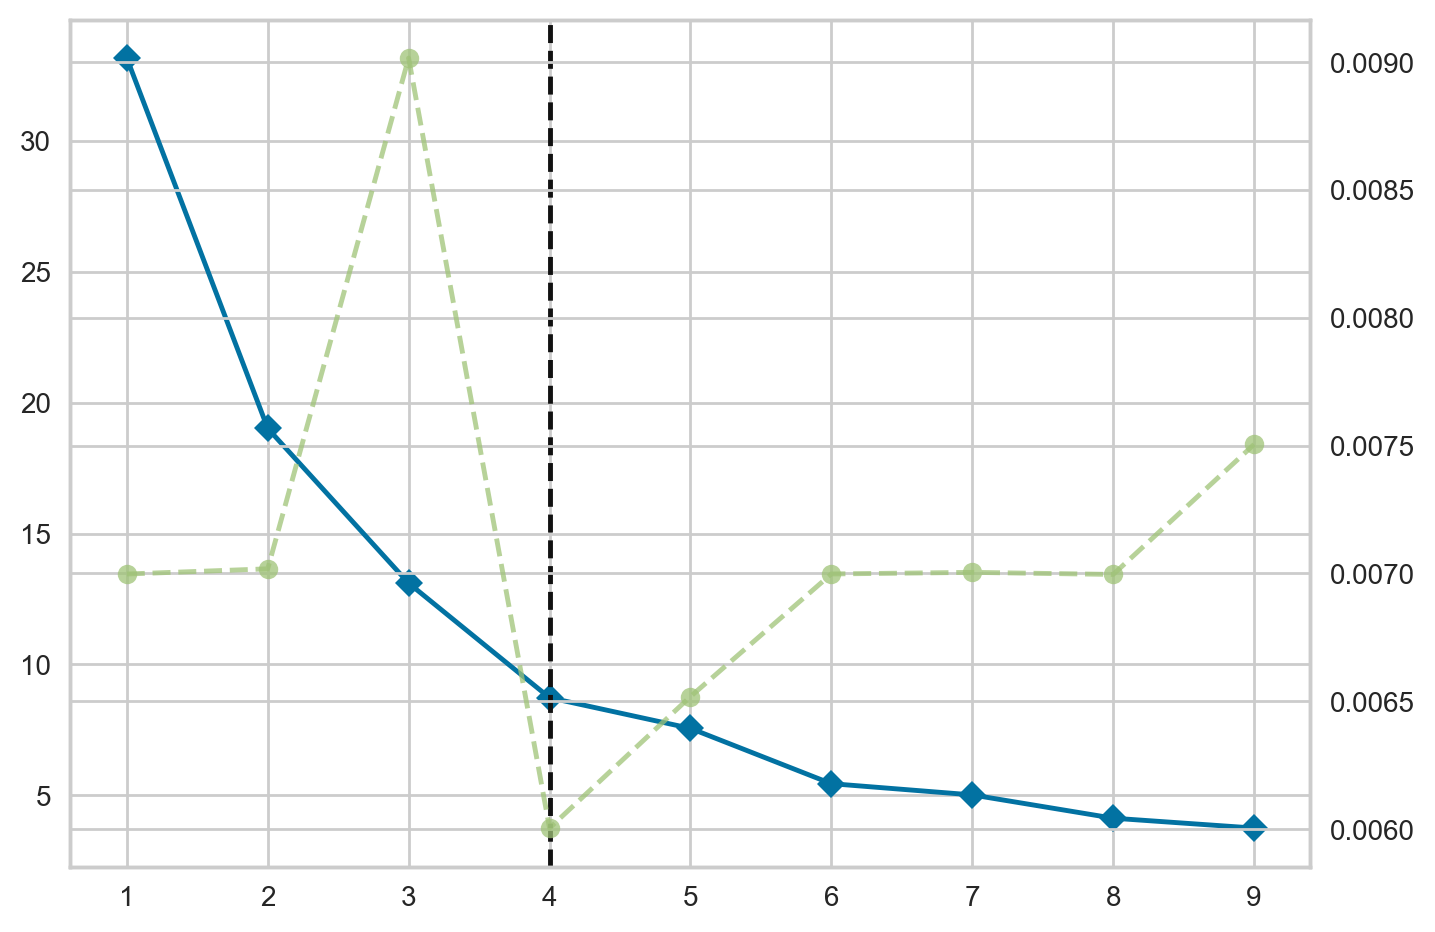

In [10]:
from yellowbrick.cluster import KElbowVisualizer
#sse와 학습시간을 나타내며, 적절한 elbow point를 구해줌
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_km[['Age','Fare']])

centroid는 5개가 적합해 보인다 (random_state에 따라 달라진다)

#### 모델링1

In [11]:
## 클러스터 개수 : 5개
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_km[['Age','Fare']])

df_kmv= df_km[['Age','Fare']].copy() #예측용 데이터셋


In [12]:
df_kmv['cluster'] = kmeans.fit_predict(df_kmv[['Age','Fare']]) #예측값

In [13]:
df_kmv

,Age,Fare,cluster
0,0.271174,0.014151,0
1,0.472229,0.139136,2
2,0.321438,0.015469,1
3,0.434531,0.103644,2
4,0.434531,0.015713,1
...,...,...,...
886,0.334004,0.025374,1
887,0.233476,0.058556,0
888,0.269234,0.045771,0
889,0.321438,0.058556,1


#### 시각화1

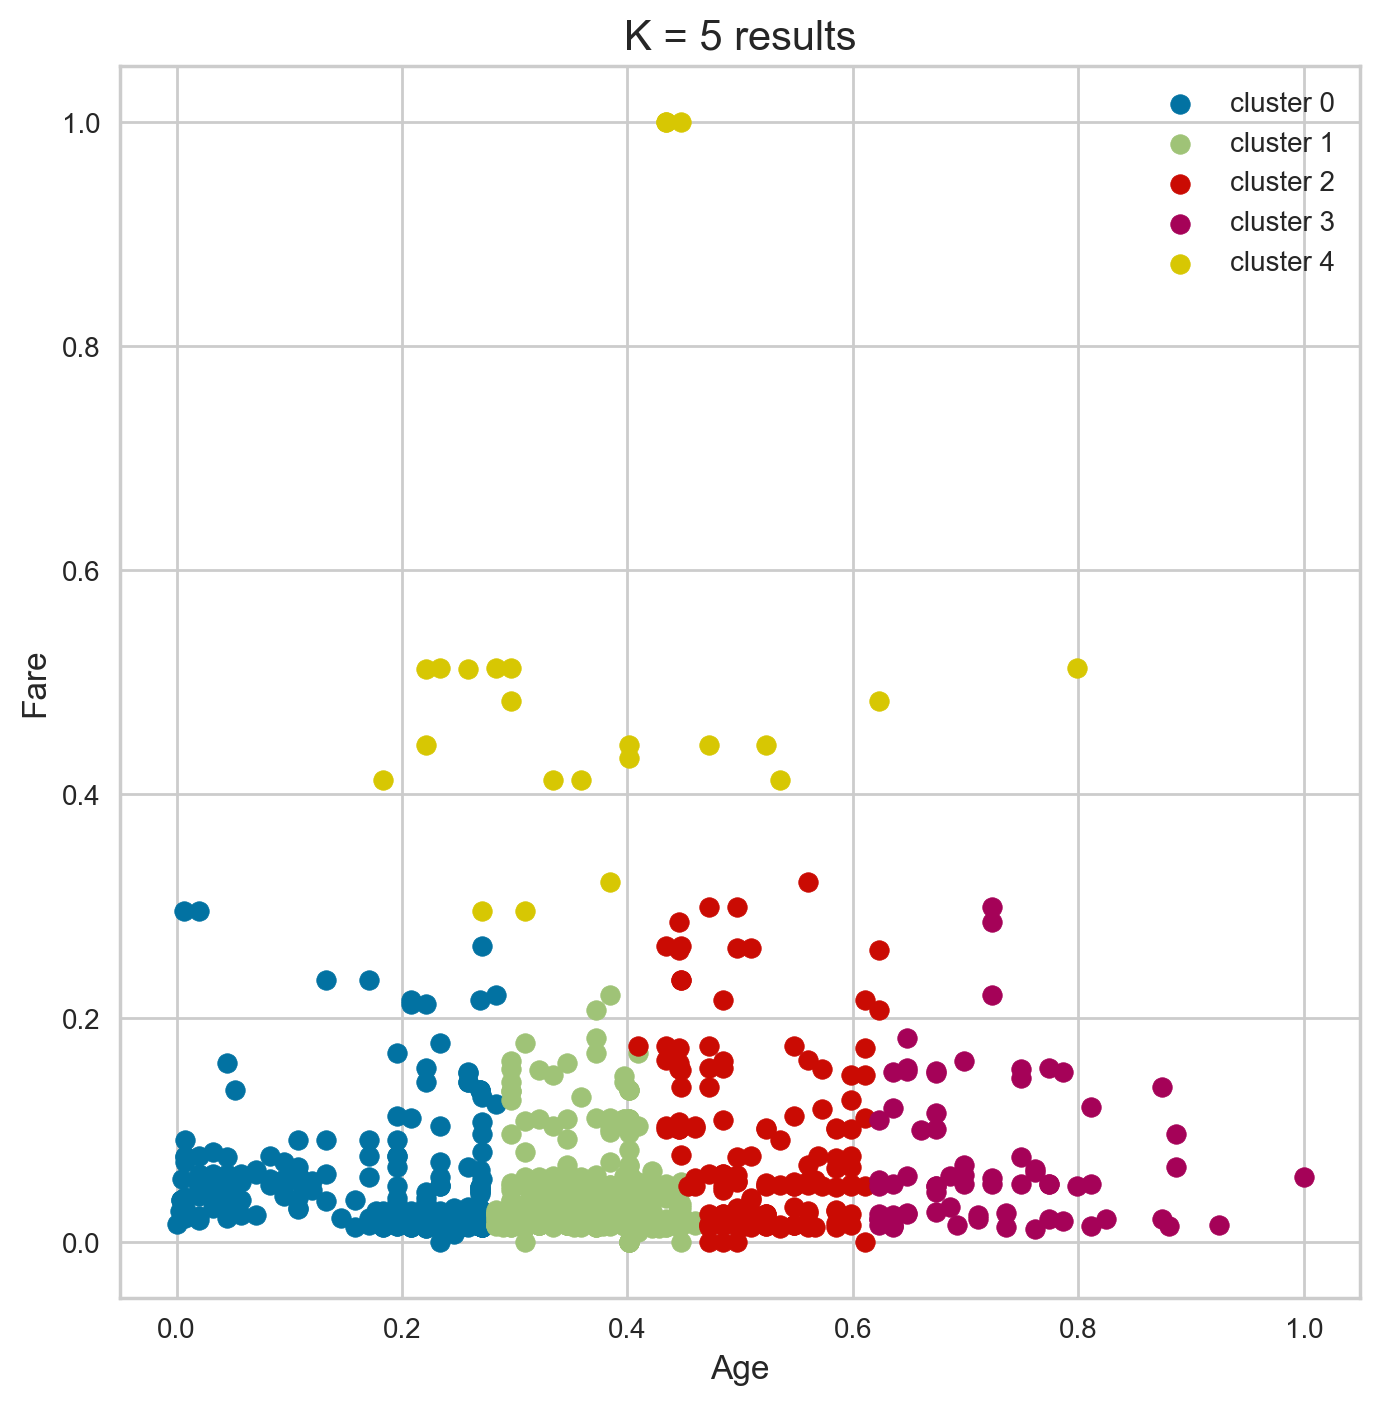

In [14]:
plt.figure(figsize = (8, 8))

k=5 #cluseter 개수

for i in range(k):
    plt.scatter(df_kmv.loc[df_kmv['cluster'] == i, df_kmv.columns[0]], df_kmv.loc[df_kmv['cluster'] == i, df_kmv.columns[1]], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel(f'{df_kmv.columns[0]}', size = 12)
plt.ylabel(f'{df_kmv.columns[1]}', size = 12)
plt.show()

#### 모델링 2

In [15]:
## 클러스터 개수 : 4개
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_km[['Age','Fare']])
df_kmv=df_km[['Age','Fare']].copy()

In [16]:
df_kmv['cluster'] = kmeans.fit_predict(df_kmv[['Age','Fare']])

#### 시각화2

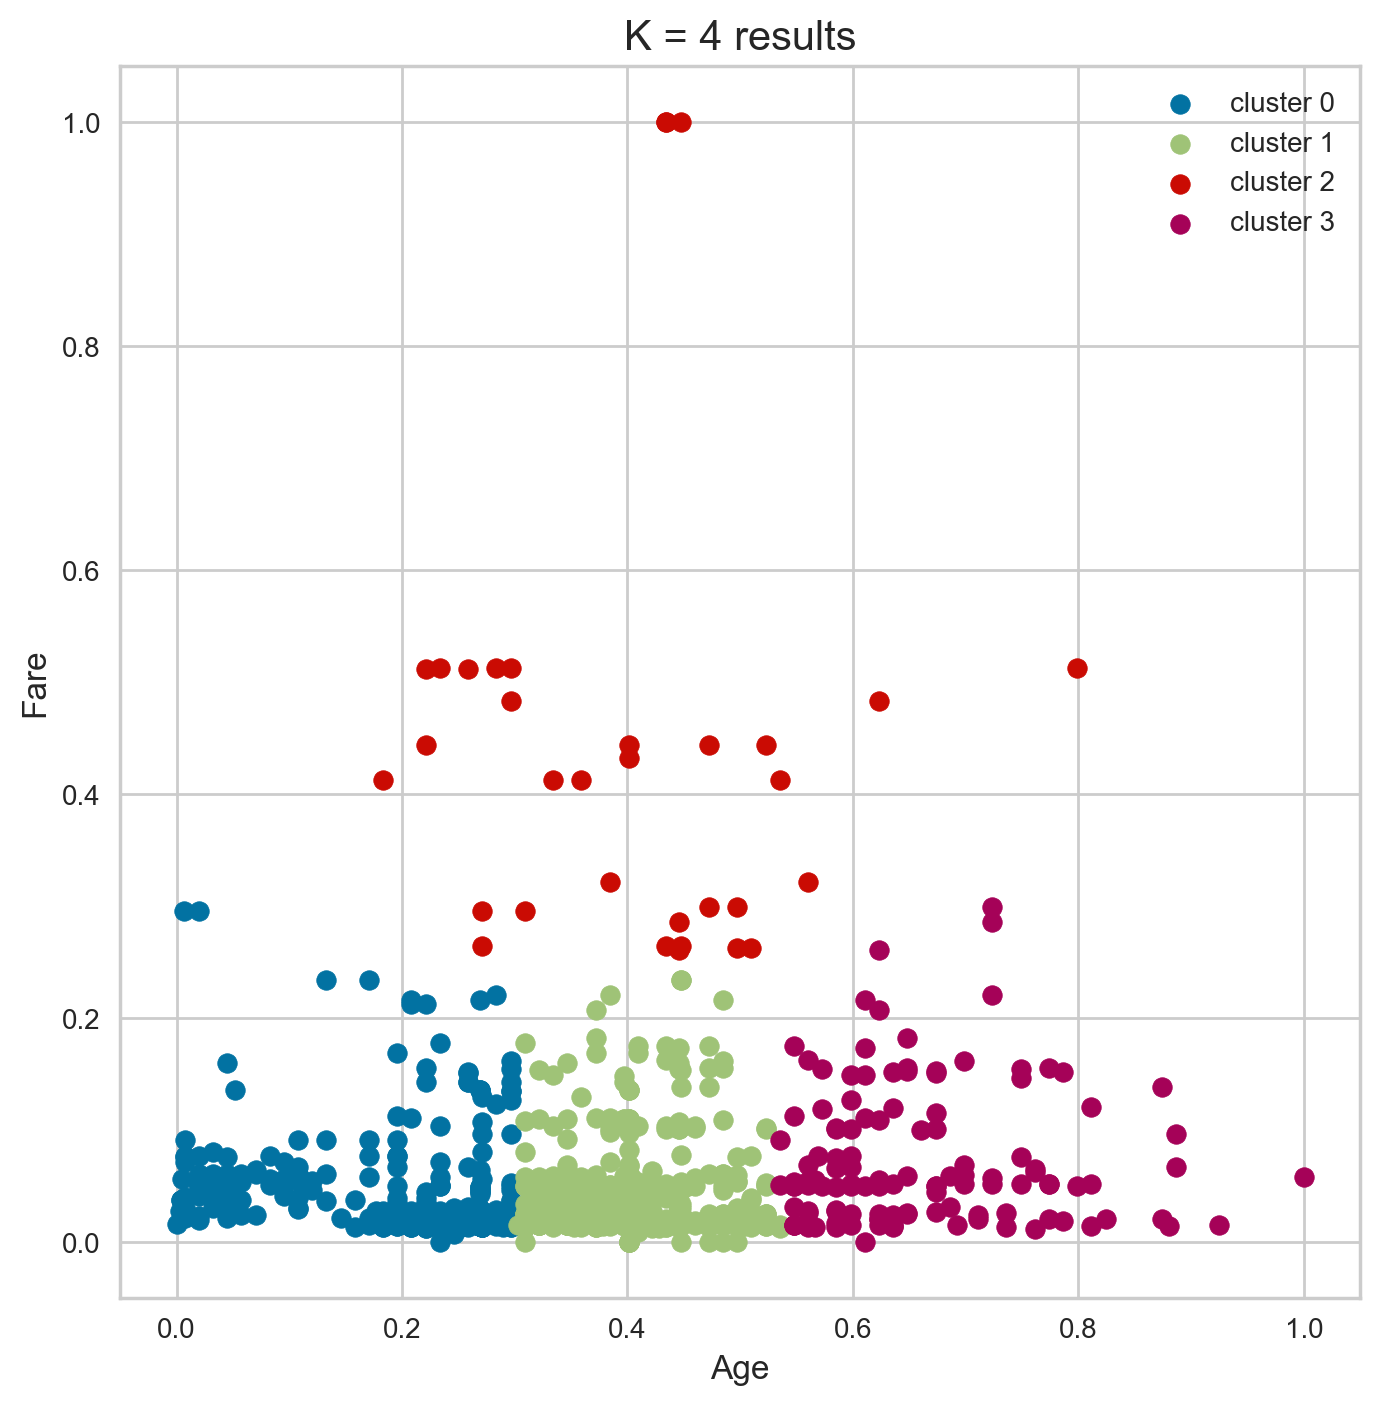

In [17]:
plt.figure(figsize = (8, 8))

k=4

for i in range(k):
    plt.scatter(df_kmv.loc[df_kmv['cluster'] == i, df_kmv.columns[0]], df_kmv.loc[df_kmv['cluster'] == i, df_kmv.columns[1]], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel(f'{df_kmv.columns[0]}', size = 12)
plt.ylabel(f'{df_kmv.columns[1]}', size = 12)
plt.show()

In [18]:
import seaborn.objects as so

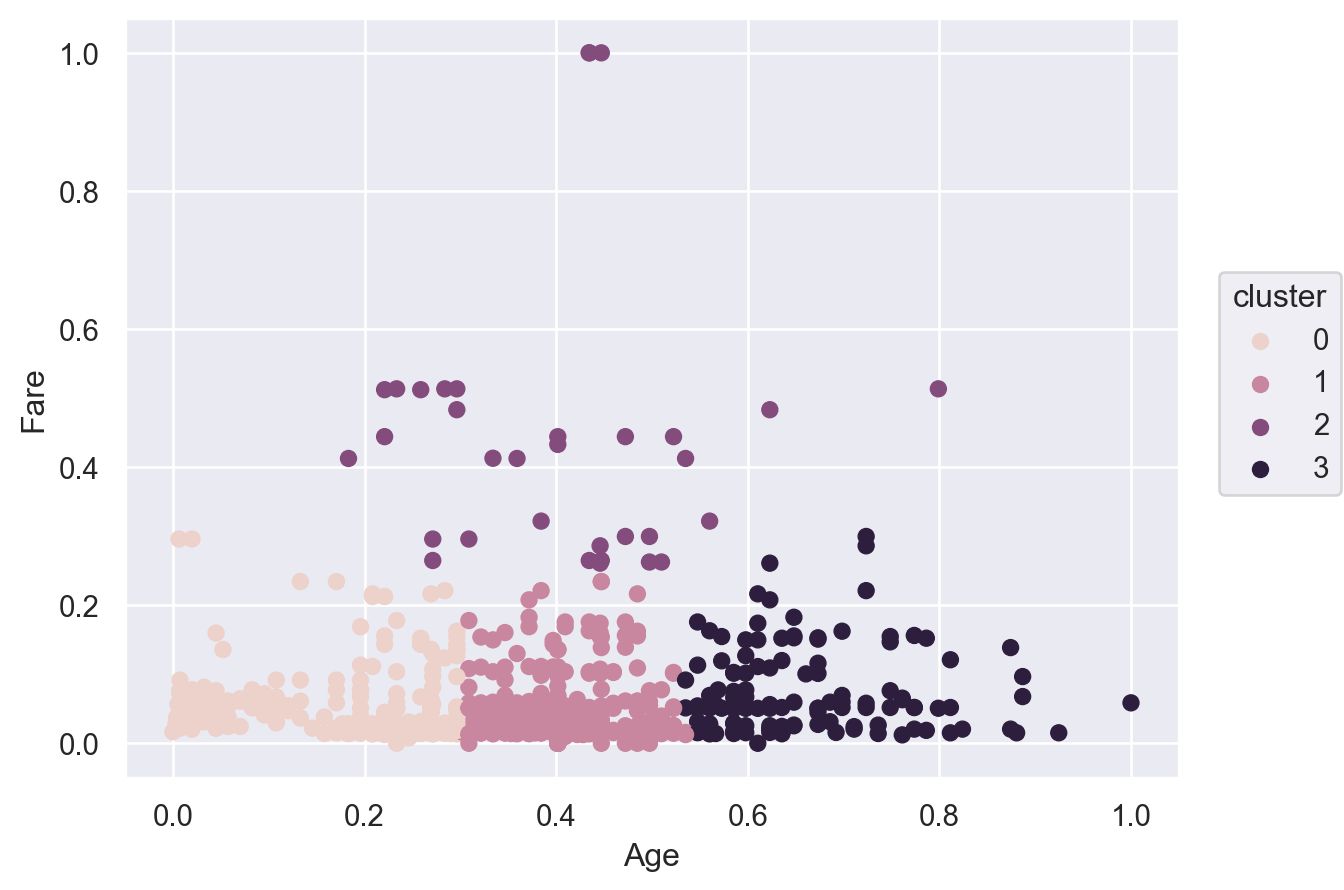

In [19]:
(
    so.Plot(data=df_kmv, x='Age', y='Fare', color='cluster')
    .add(so.Dot())
)

#### 실루엣 계수 (Silhouette Coefficient)
- 클러스터 내 데이터 간의 결속력(cohesion)과 클러스터 간 분리도(separation)를 평가하는 지표
- 범위 : -1 ~ 1
- 1에 가까울수록 데이터가 자신이 속한 클러스터에 잘 소속되어 있으며 다른 클러스터와 명확히 분리
- 0에 가까울수록 데이터가 경계에 위치하여 클러스터가 불명확
- 음수(-): 데이터가 잘못된 클러스터에 소속되었을 가능성

In [20]:
from sklearn.metrics import silhouette_score
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_km[['Age','Fare']])
    silhouette_avg = silhouette_score(df_km[['Age','Fare']], cluster_labels) #실루엣 계수 계산
    silhouette_scores.append({
        'k': k,
        'silhouette_score': silhouette_avg
    })

silhouette_df = pd.DataFrame(silhouette_scores)
silhouette_df

,k,silhouette_score
0,2,0.422341
1,3,0.440494
2,4,0.477954
3,5,0.414412
4,6,0.506758
5,7,0.426746
6,8,0.450712
7,9,0.441541
8,10,0.441678


cluster가 6일 때 제일 좋다
- cluster가 많을 수록 안좋을 때가 많다

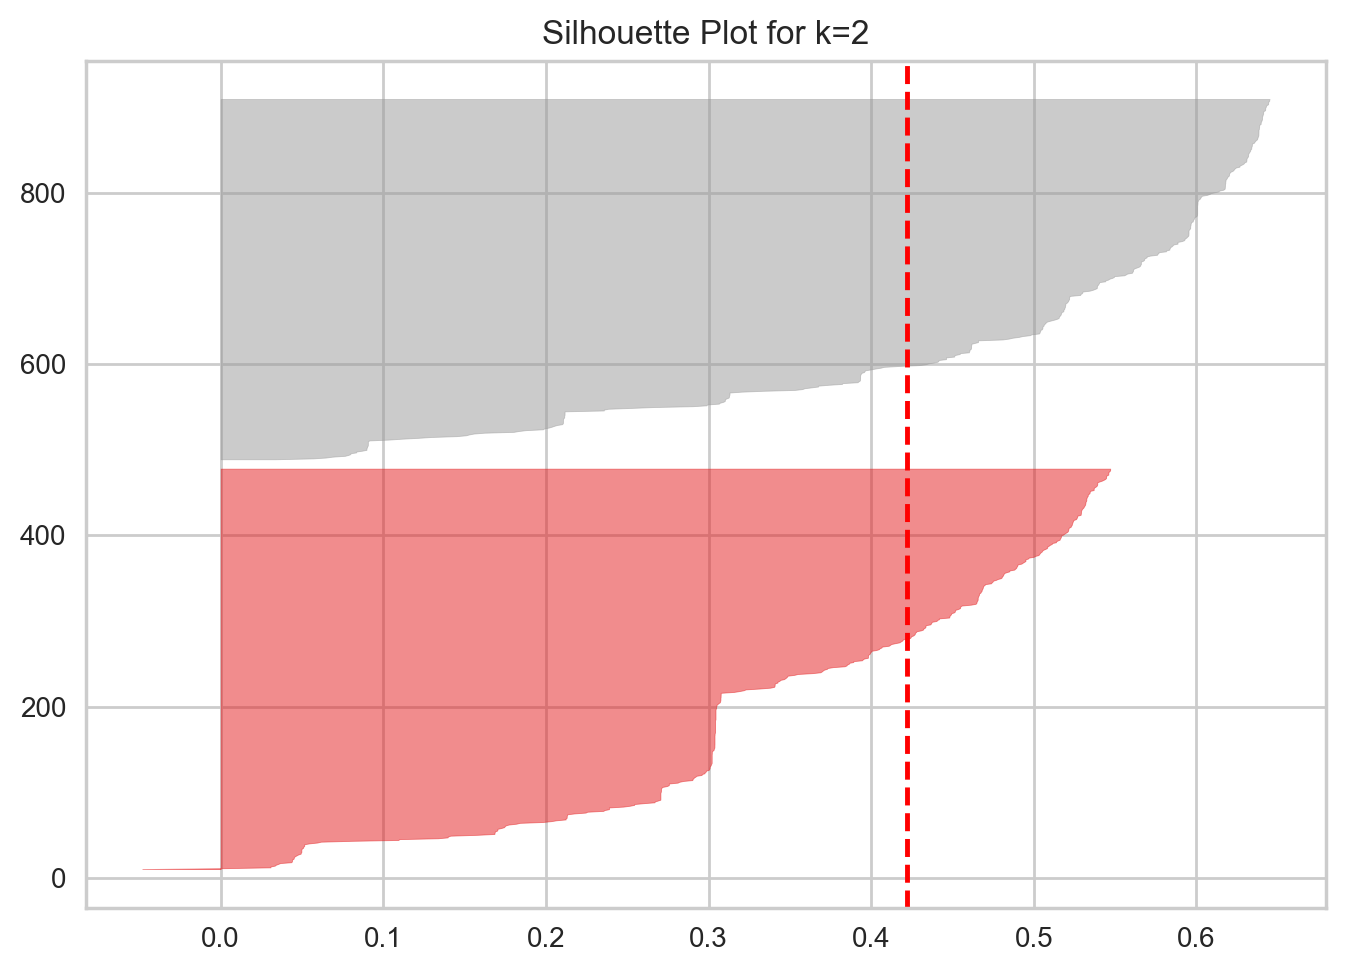

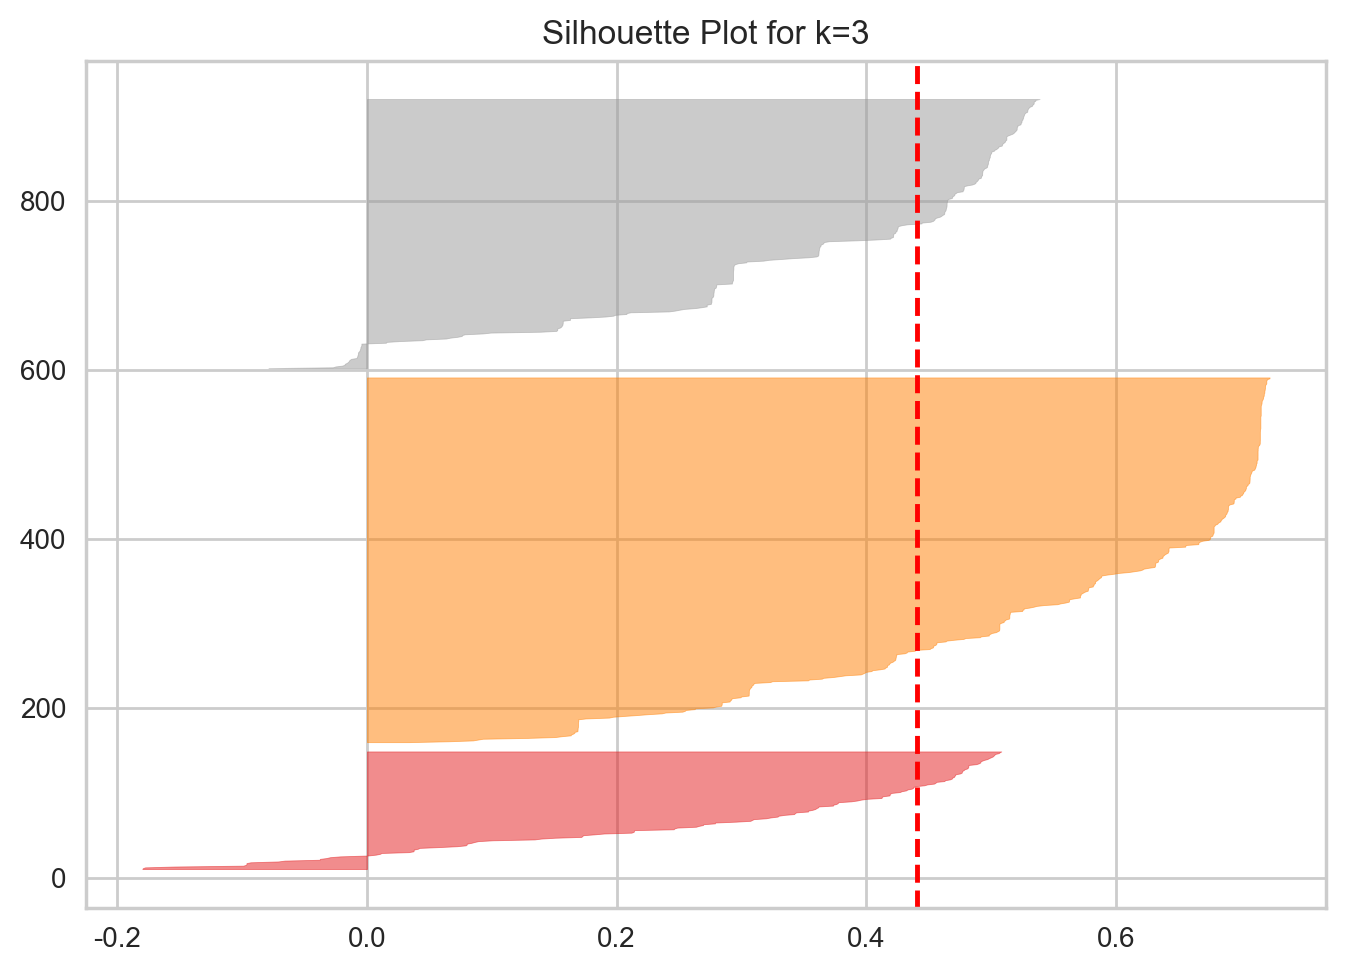

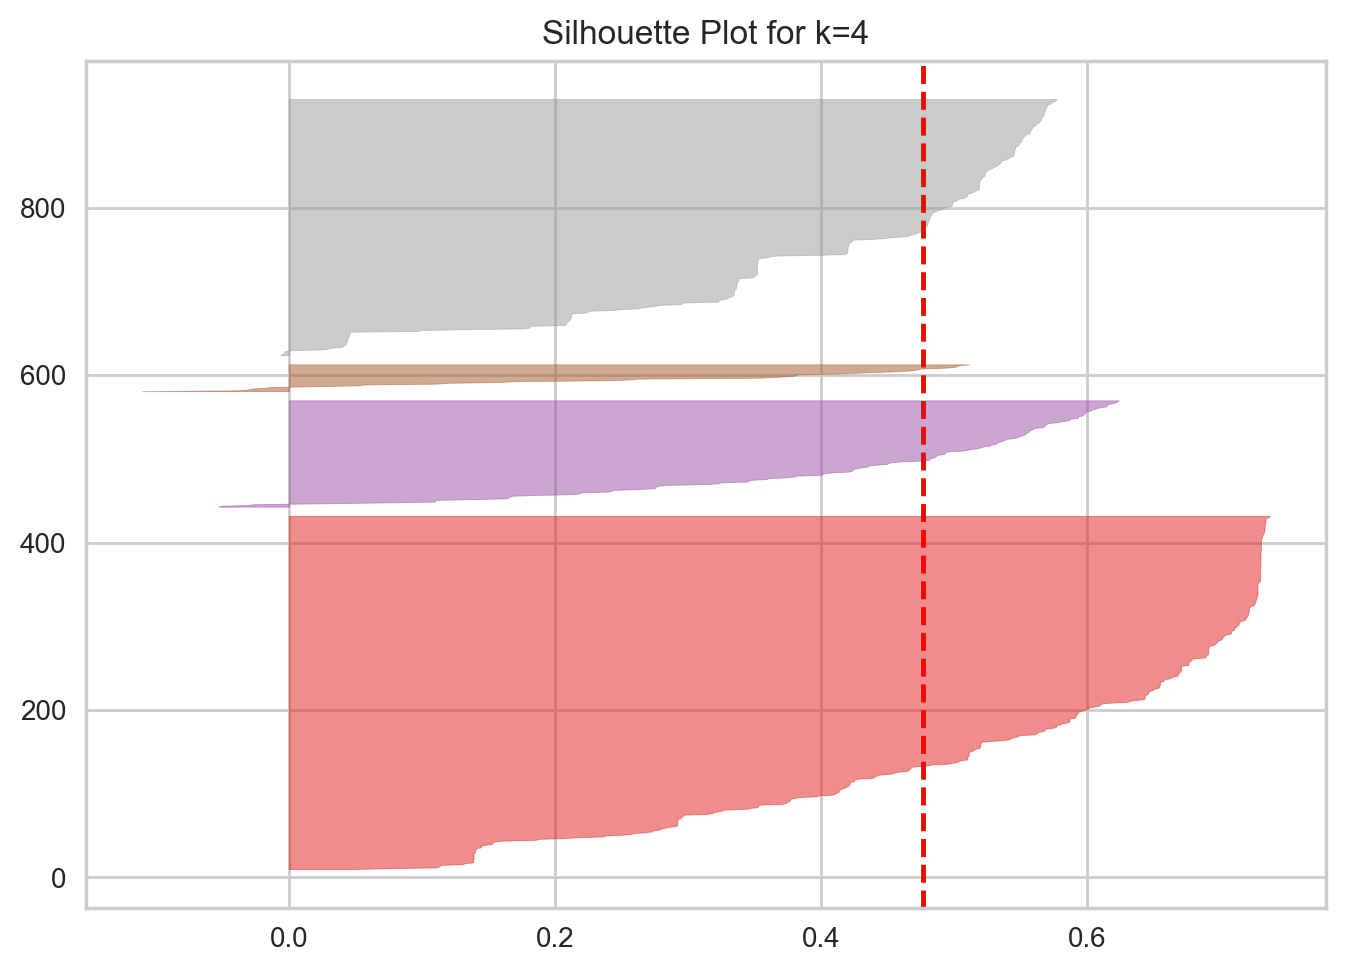

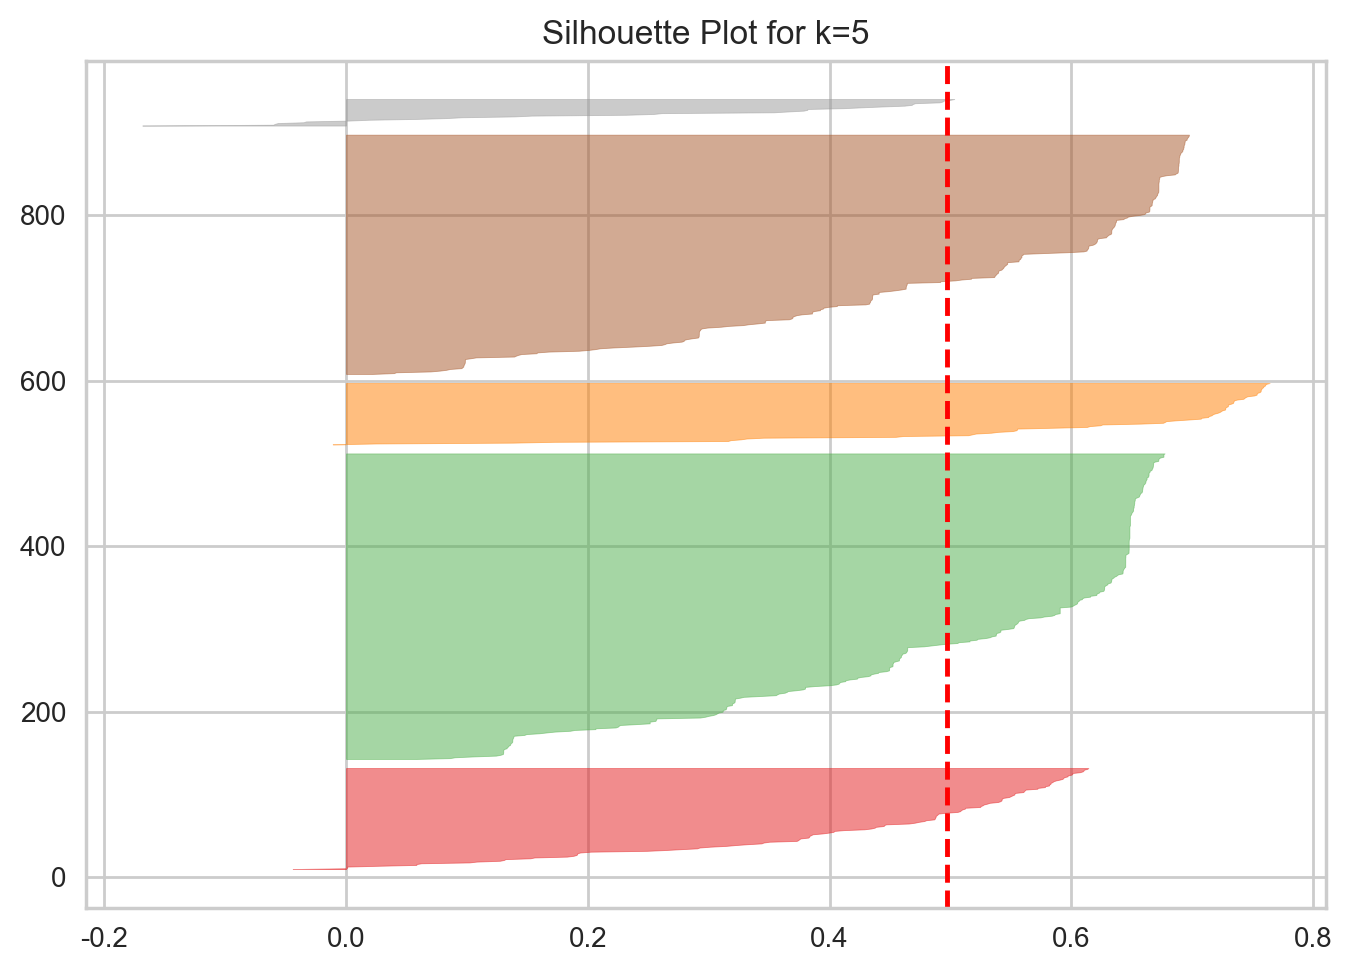

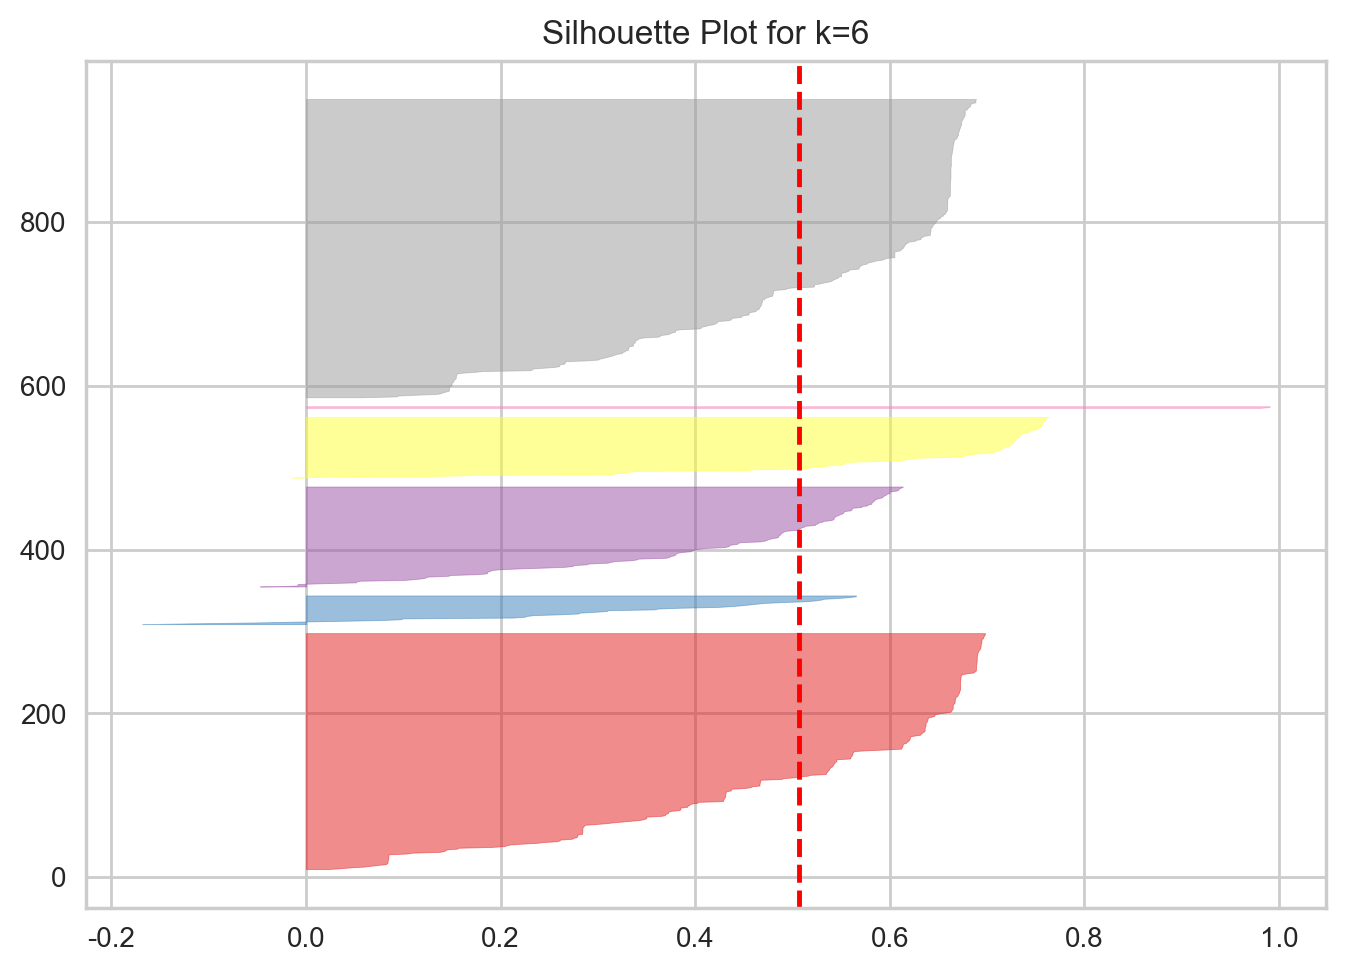

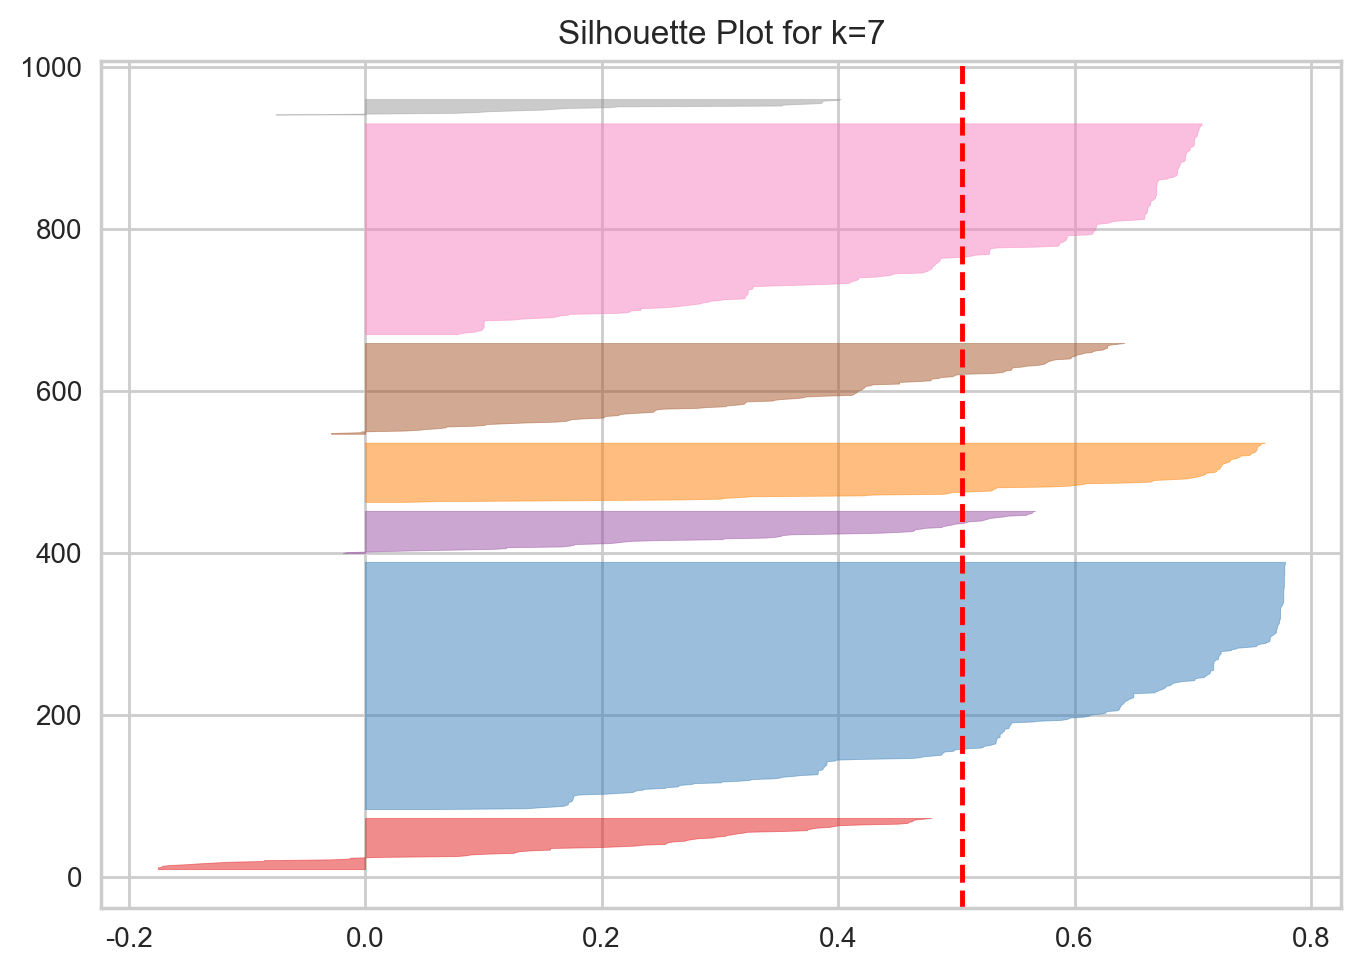

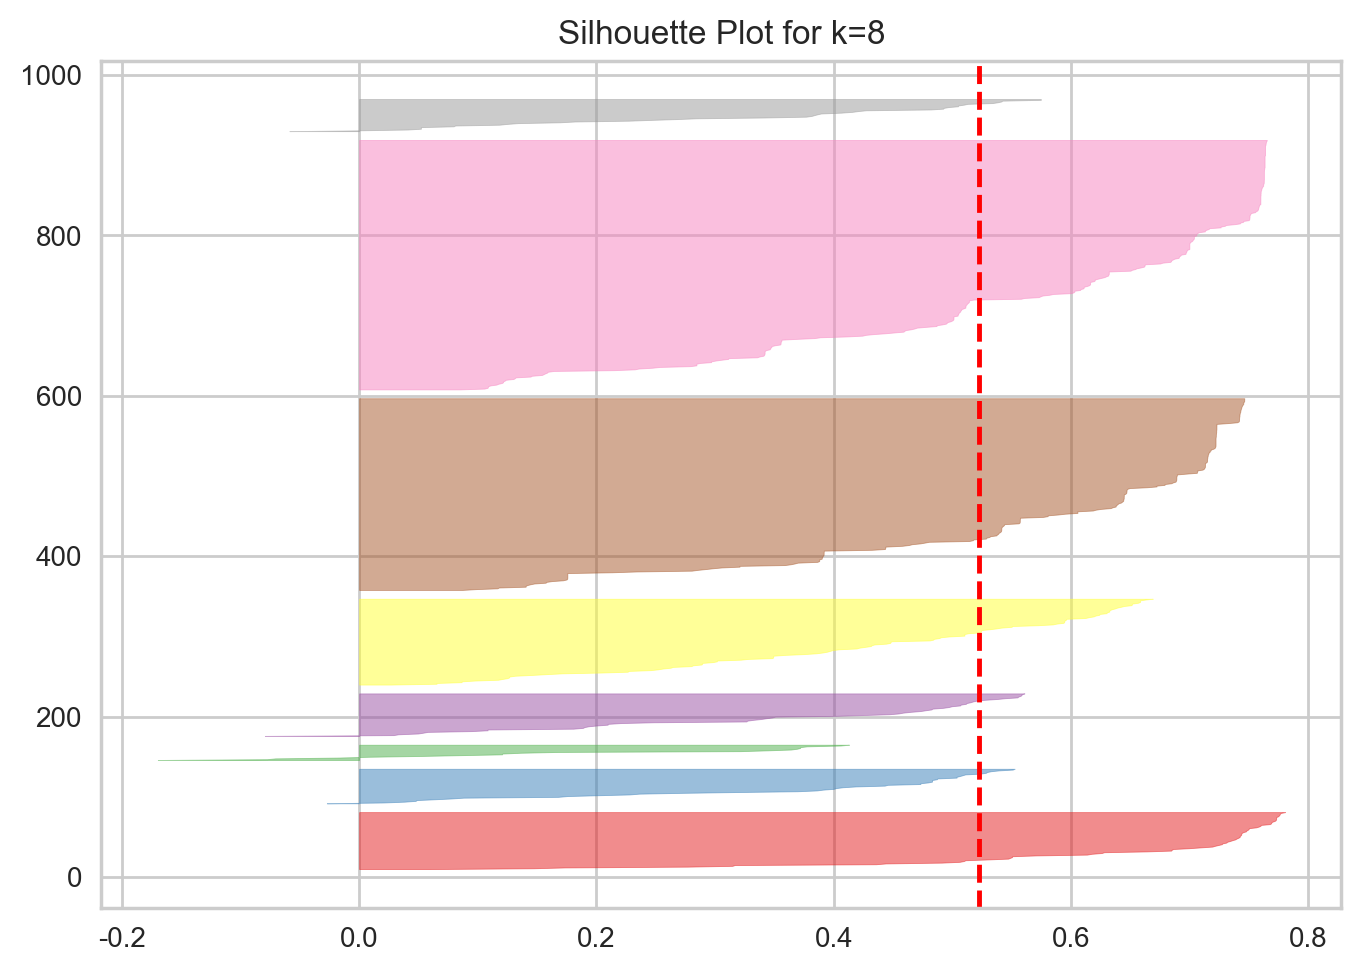

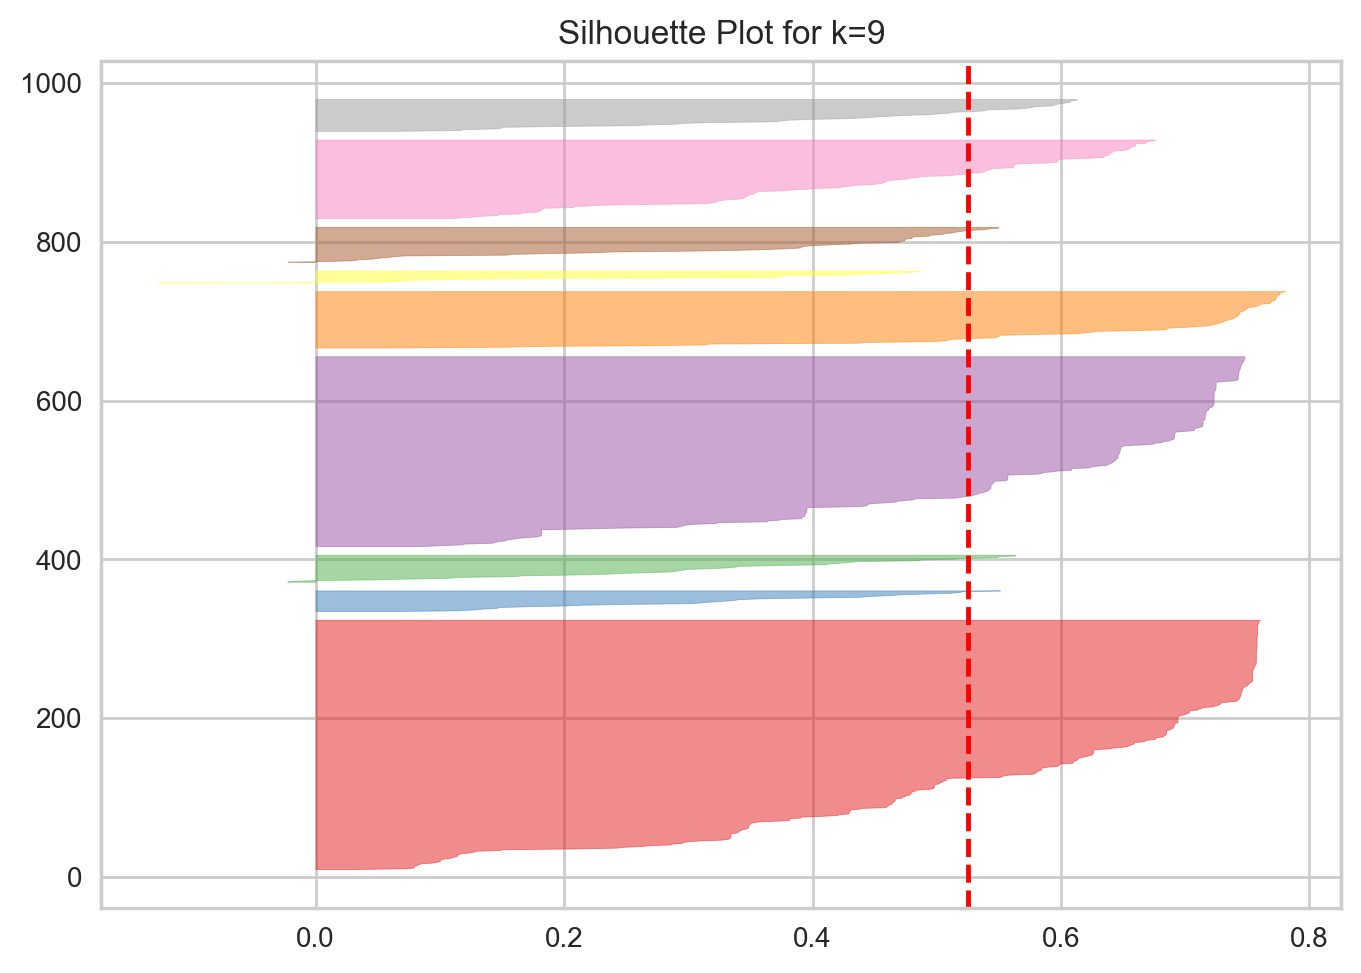

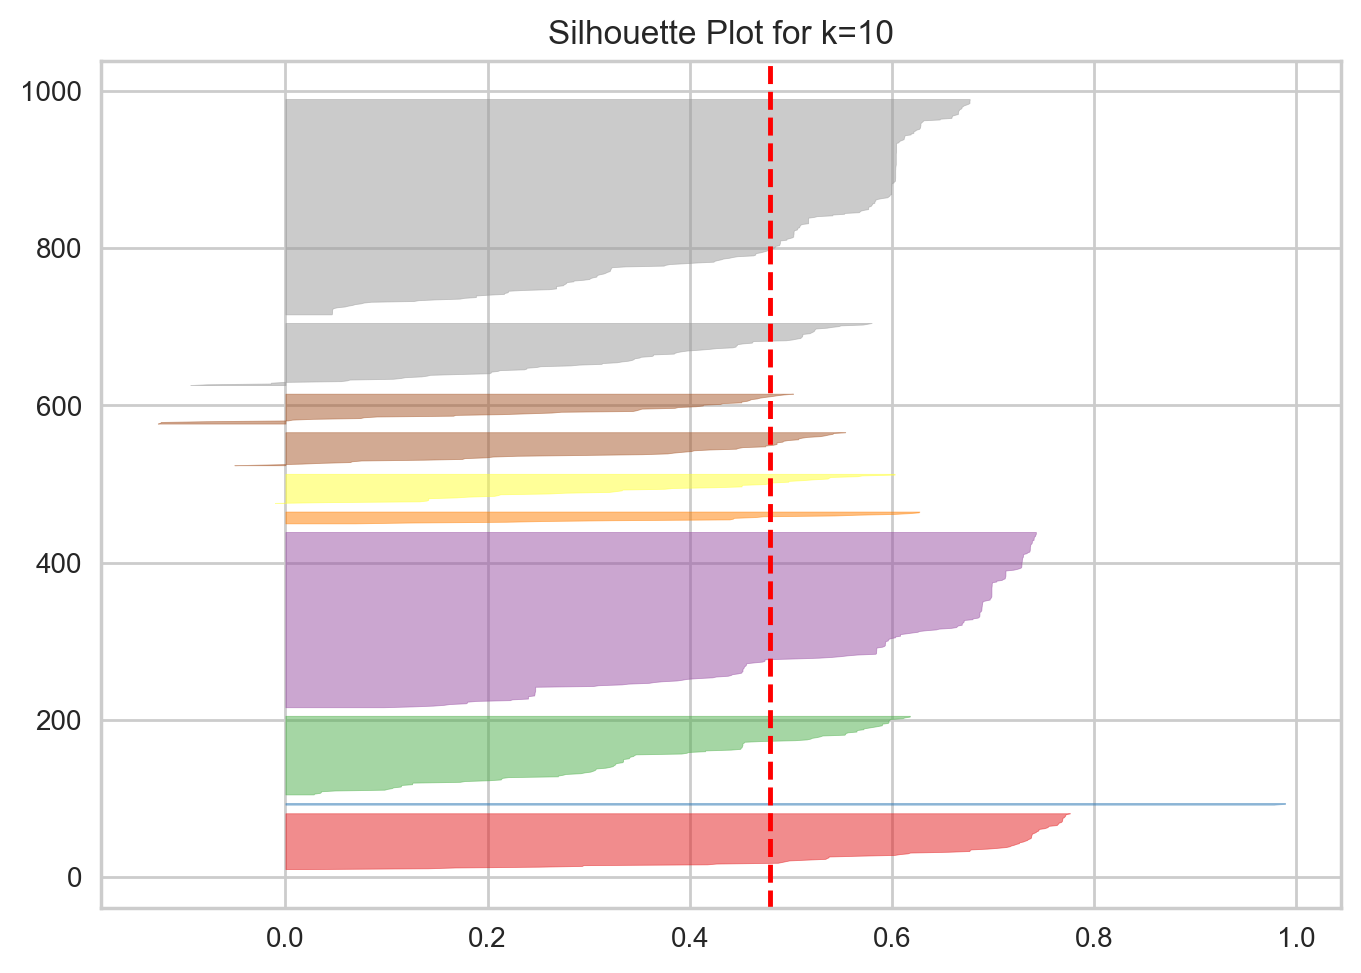

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer
#클러스터링 모델 생성
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=111, init='random')
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(df_km[['Age','Fare']])
    plt.title(f'Silhouette Plot for k={k}')
    plt.show()

### PCA

#### scree plot
- 각 주성분이 데이터의 분산을 얼마나 설명하는지 시각화

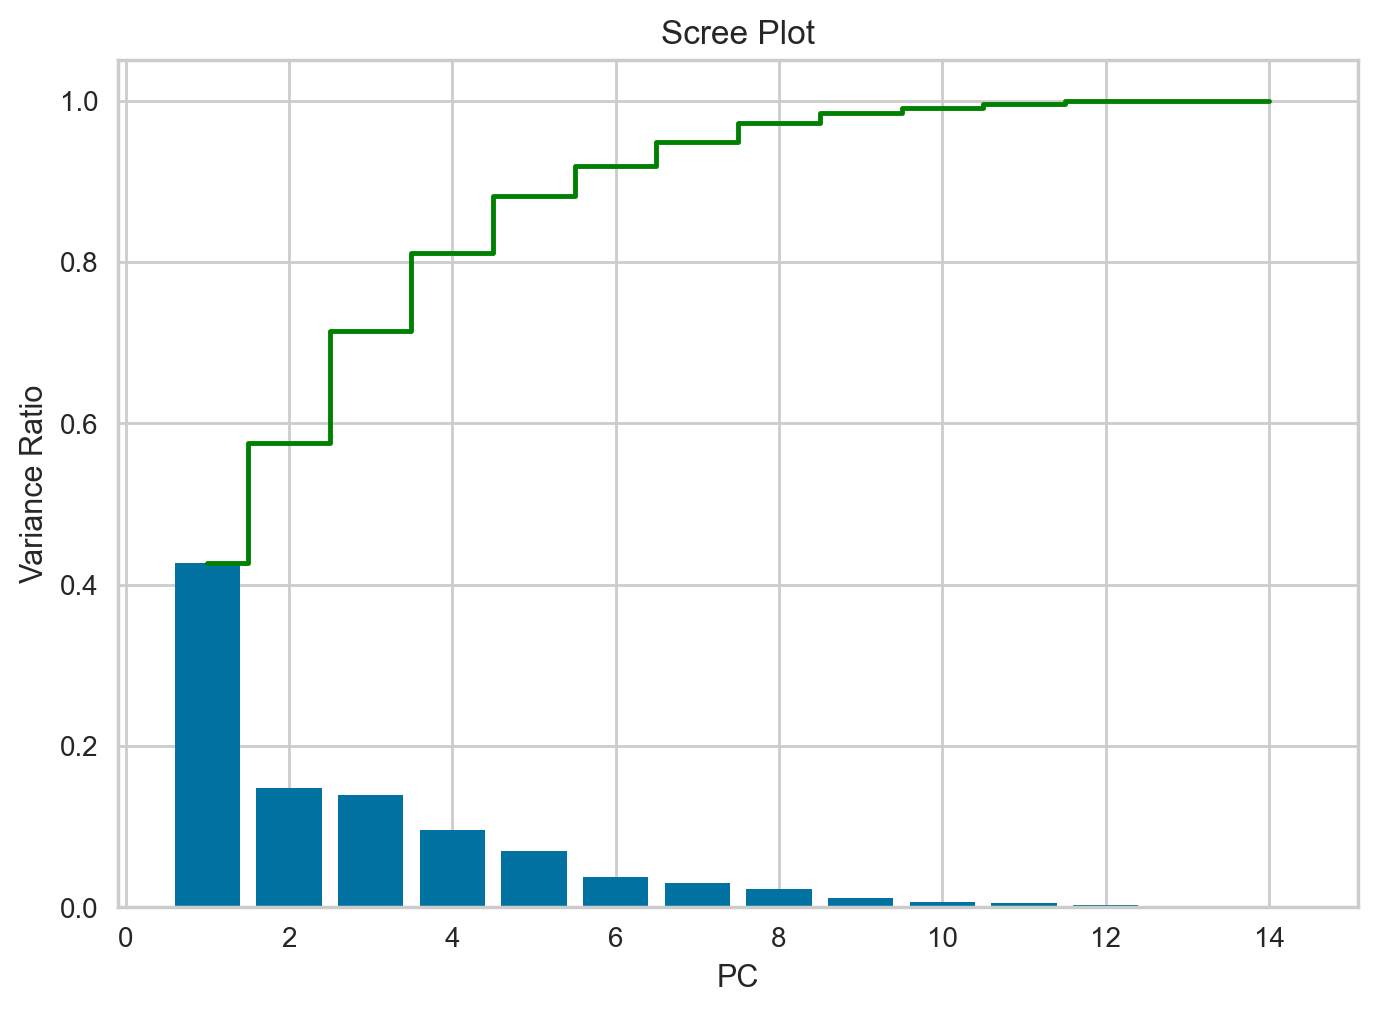

In [22]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(df2)

explained_variance = pca.explained_variance_ratio_

# Scree plot 그리기
x_axis = range(1, len(explained_variance)+1)
plt.bar(x_axis, explained_variance,
        align = 'center', label = 'Individual Explained Variance Ratio')
plt.step(x_axis, np.cumsum(explained_variance),
            where = 'mid', color='green', label='Cumulative Explained Variance Ratio')
plt.xlabel('PC')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot')
plt.show()

#### PC 해석

In [27]:
#주성분 3개
pca=PCA(n_components=3)
pca.fit(df2)

pc=pd.DataFrame(pca.components_.T, columns=["PC1","PC2","PC3"], index=df2.columns) #주성분점수
pc

,PC1,PC2,PC3
Survived,-0.439738,0.237897,-0.324941
Pclass,-0.133963,0.455310,-0.531118
Age,0.032541,0.103320,-0.119575
SibSp,-0.023156,-0.006410,0.075047
Parch,-0.042623,0.019477,0.062288
Fare,-0.031991,0.041429,-0.072391
FamilySize,-0.044098,0.006559,0.097410
Title_Miss,-0.333581,-0.355027,0.229752
Title_Mr,0.557596,0.016786,-0.196045
Title_Mrs,-0.211599,0.311008,-0.034108


In [29]:
#주성분 2개
pca=PCA(n_components=2)
pca.fit(df2)

pc=pd.DataFrame(pca.components_.T, columns=["PC1","PC2"], index=df2.columns)
pc

,PC1,PC2
Survived,-0.439738,0.237897
Pclass,-0.133963,0.455310
Age,0.032541,0.103320
SibSp,-0.023156,-0.006410
Parch,-0.042623,0.019477
Fare,-0.031991,0.041429
FamilySize,-0.044098,0.006559
Title_Miss,-0.333581,-0.355027
Title_Mr,0.557596,0.016786
Title_Mrs,-0.211599,0.311008


#### 모델링
- 원래의 데이터를 주성분 좌표계로 변환
- df_pca : PC1,PC2 축으로 표현된 데이터 (변환된 데이터 프레임)

In [31]:
df_pca = pd.DataFrame(pca.transform(df2), columns=["PC1","PC2"], index=df2.index)
df_pca

,PC1,PC2
0,0.775738,-0.016804
1,-1.229886,0.367645
2,-1.094453,-0.182811
3,-1.112878,0.953727
4,0.788308,0.000284
...,...,...
886,0.155999,0.228061
887,-1.232657,0.265196
888,-0.687715,-0.417187
889,0.092458,0.092134


### PCA 후 K-means

#### Elbow method

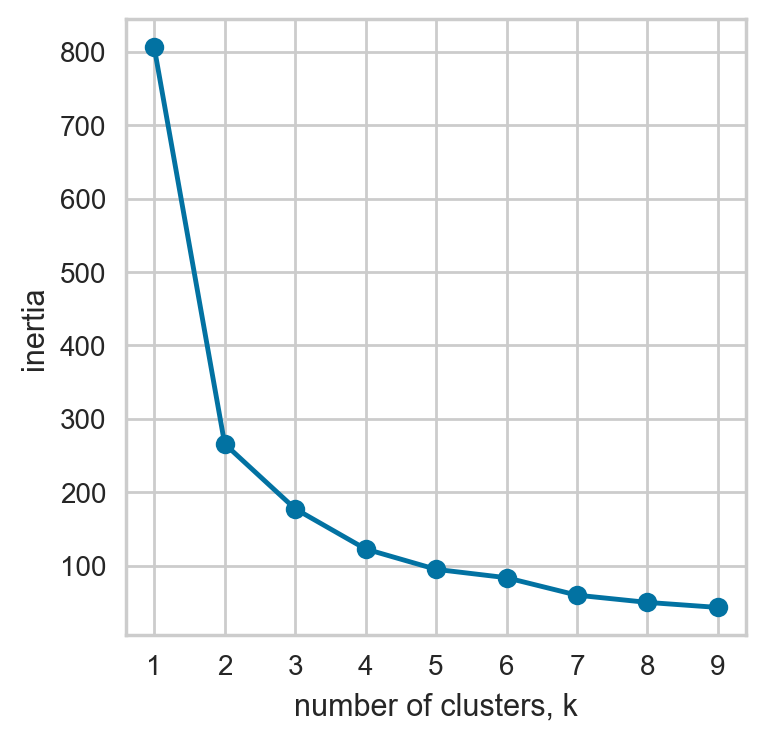

In [35]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_pca) # 차원 축소한 데이터
    inertias.append(model.inertia_)

plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(1, 10))

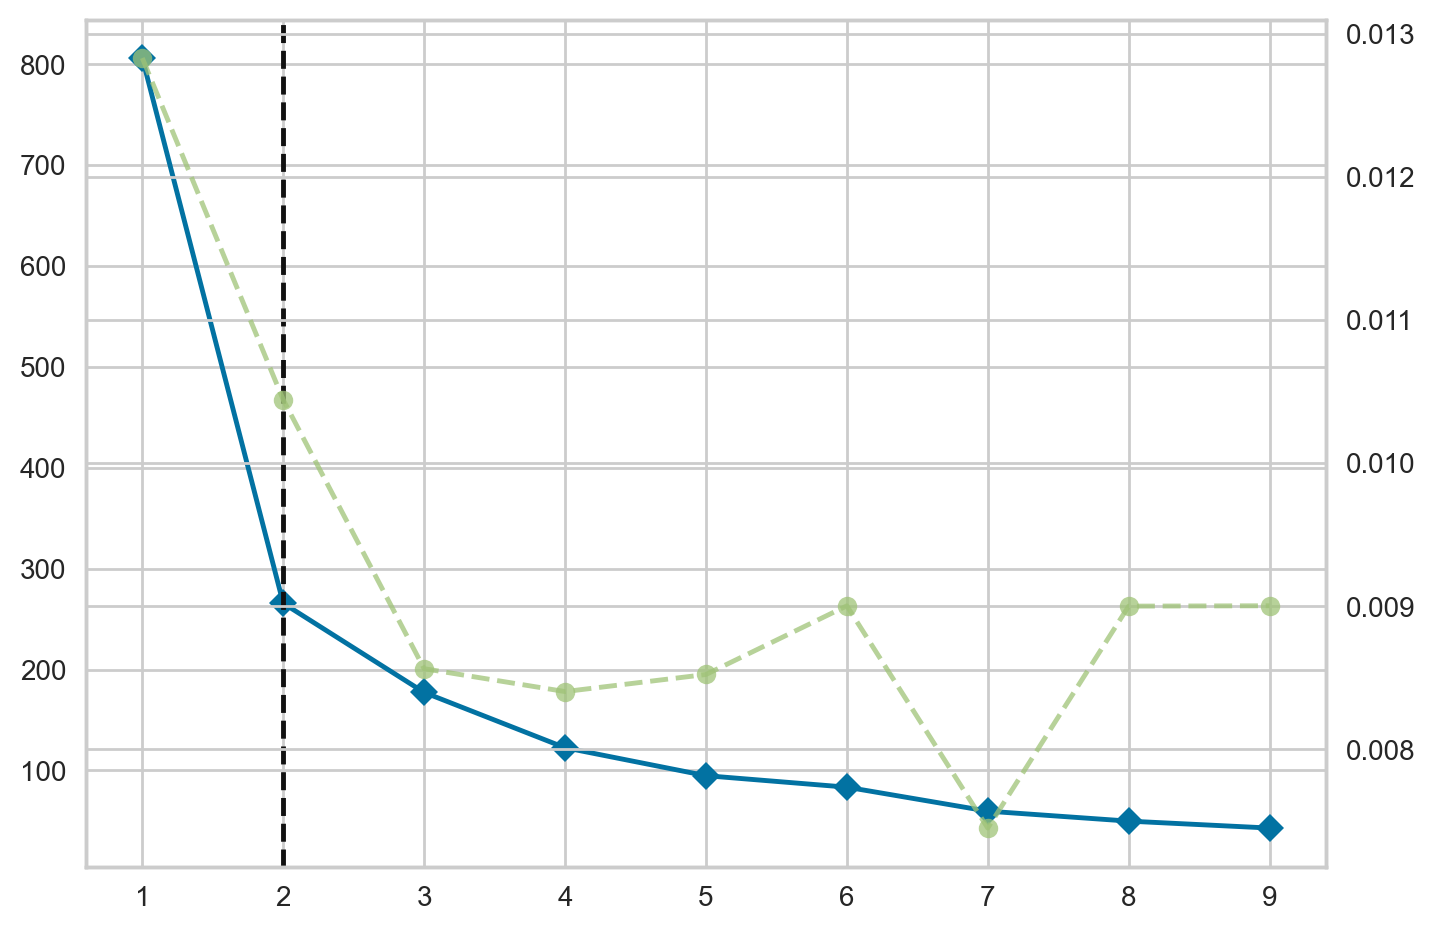

In [43]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_pca)

#### 모델링

In [44]:
kmeans=KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_pca)

df_pcav=df_pca.copy()
df_pcav['cluster']=kmeans.fit_predict(df_pca)

#### 시각화

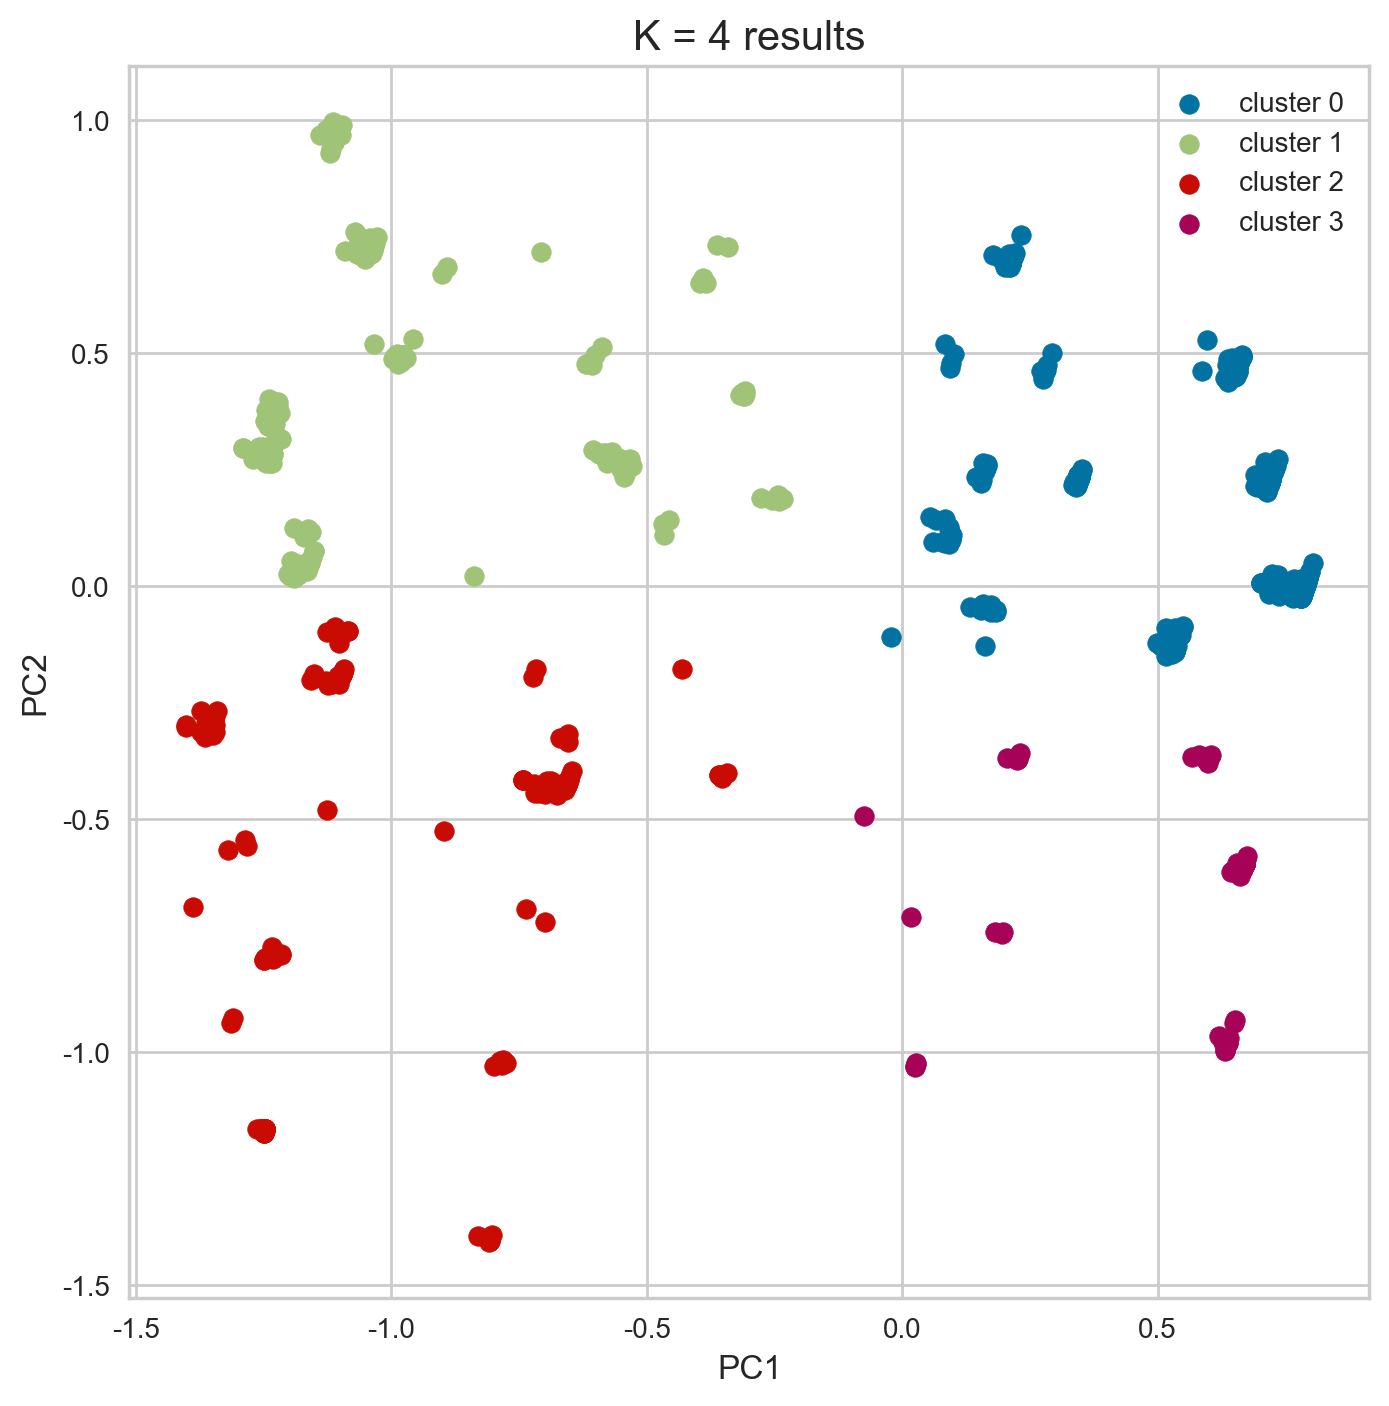

In [45]:
plt.figure(figsize = (8, 8))

k=4

for i in range(k):
    plt.scatter(df_pcav.loc[df_pcav['cluster'] == i, df_pcav.columns[0]], df_pcav.loc[df_pcav['cluster'] == i, df_pcav.columns[1]], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel(f'{df_pcav.columns[0]}', size = 12)
plt.ylabel(f'{df_pcav.columns[1]}', size = 12)
plt.show()